<a href="https://colab.research.google.com/github/manuelquinteroc/6.7960-Deep-Learning/blob/main/Pset1_XOR_prob7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAKE A COPY OF THIS COLAB**




b) **XOR gate; 2pt** Construct a ReLU network with at most $3$ layers, each with width at most $4$ and $2$-dimensional inputs in $ℝ^2$  such that: \begin{align}
           f(x; W_1, W_2, b_1, b_2) > 0 \iff
           & (x_1 < 0 \mathrel{\mathrm{AND}} x_2 > 0) \mathrel{\mathrm{OR}} {} \notag\\
           & (x_1 > 0 \mathrel{\mathrm{AND}} x_2 < 0)
       \end{align}
       
       Write out the algebraic formula of *f* with explicit weight matrices and bias vectors.

The code below is meant to allow you to test your answer and check if it is correct.
**Don't forget to provide a justification/explaination of your derivation in your writeup!**

/tmp/ipython-input-1244442724.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output = float(W3 @ h2)


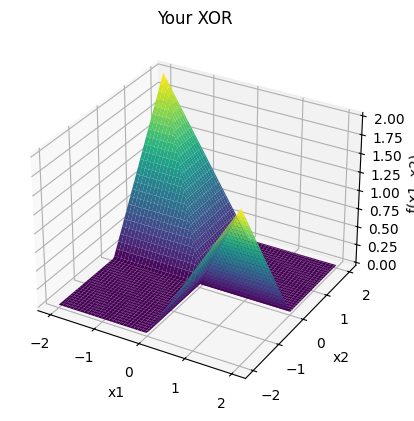

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def answer():
    # Define ReLU function
    def relu(x):
        return np.maximum(0, x)

    # Define the function f(x)
    def f(x1, x2):
        x = np.array([x1, x2])

        # First ReLU layer
        W1 = np.array([[ 1,  0],
                       [-1,  0],
                       [ 0,  1],
                       [ 0, -1]])

        h1 = relu(W1 @ x)

        # Second ReLU layer
        W2 = np.array([[0, 1, -1, 0],
                       [1, 0,  0, -1],
                       [1, 0,  0,  0],
                       [0, 1,  0,  0]])

        h2 = relu(W2 @ h1)

        # Final linear layer (if needed)
        W3 = np.array([[-1, -1, 1, 1]])


        output = float(W3 @ h2)
        return output

    # Create a grid of points for testing answer:
    x1_vals = np.linspace(-2, 2, 100)
    x2_vals = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)

    # Evaluate f over the grid
    vf = np.vectorize(f)
    Z = vf(X1, X2)
    title = "Your XOR"

    return X1, X2, Z,title

X1, X2, Z,title = answer()



# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title(title)
plt.show()
